In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kokil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
data=pd.read_csv('https://raw.githubusercontent.com/Kokila412/ML_internship/refs/heads/main/IMDB%20Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [81]:
data['sentiment'].value_counts()


sentiment
negative    263
positive    237
Name: count, dtype: int64

In [82]:
data.dropna(inplace=True)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [83]:
def remove_stopwords(review):
    words=''.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return words

In [84]:
data['review']=data['review'].apply(remove_stopwords)
data

,review,sentiment
0,Onereviewersmentionedwatching1Ozepisodehooked....,positive
1,wonderfullittleproduction.filmingtechniqueunas...,positive
2,"thoughtwonderfulwayspendtimehotsummerweekend,s...",positive
3,Basicallythere'sfamilylittleboy(Jake)thinksthe...,negative
4,"PetterMattei's""LoveTimeMoney""visuallystunningf...",positive
...,...,...
495,"""AmericanNightmare""officiallytied,opinion,""It'...",negative
496,"Firstoff,saylovedbookAnimalFarm.read9thgradecl...",negative
497,movieextremelyboring.laughedtimes.decidedrentn...,negative
498,"disgustedmovie.graphicsexscenes,ruinedimageArt...",negative


In [85]:
from wordcloud import WordCloud


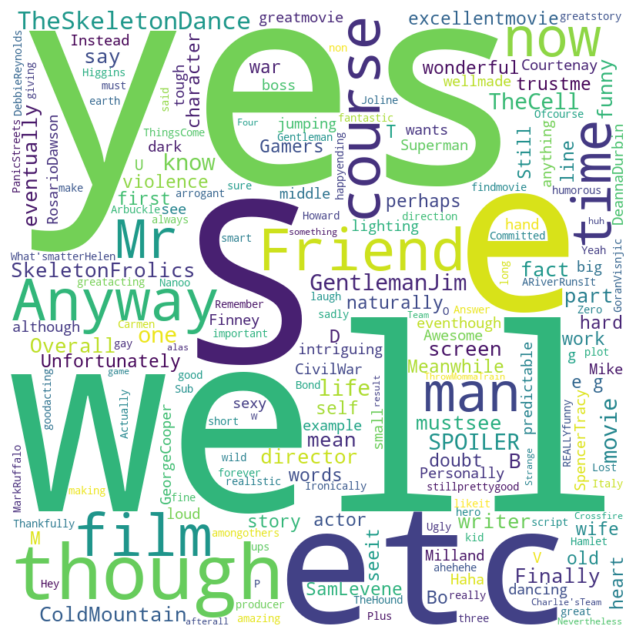

In [86]:
reviews1=''.join(word for word in data['review'][data['sentiment']=='positive'].astype(str))
wordcloud=WordCloud(width=800,height=800,background_color='white')
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud.generate(reviews1),interpolation='bilinear')
plt.axis('off')
plt.show()

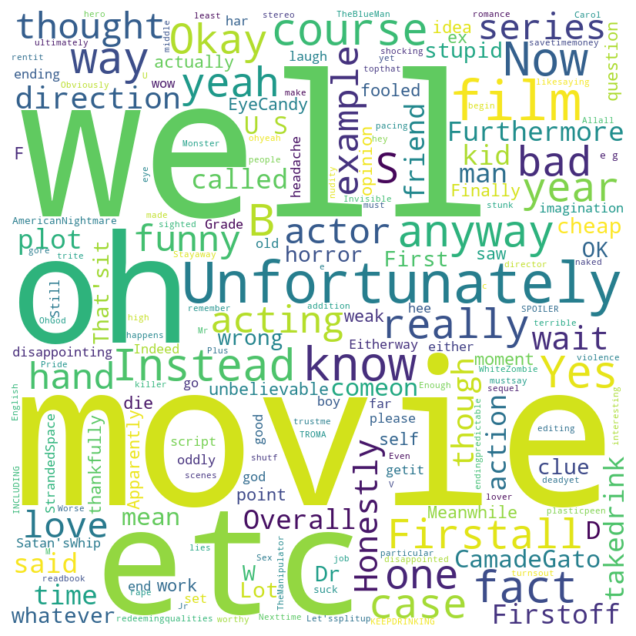

In [87]:
reviews2=''.join(word for word in data['review'][data['sentiment']=='negative'].astype(str))
wordcloud=WordCloud(width=800,height=800,background_color='white')
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud.generate(reviews2),interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [89]:
reviews=cv.fit_transform(data['review']).toarray()

In [90]:
data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])
data['sentiment'].value_counts()

C:\Users\kokil\AppData\Local\Temp\ipykernel_16512\1239385384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])


sentiment
0    263
1    237
Name: count, dtype: int64

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model=LogisticRegression()


In [92]:
reviews_train,reviews_test,sentiment_train,sentiment_test=train_test_split(reviews,data['sentiment'],test_size=0.2,random_state=0)

In [93]:
model.fit(reviews_train,sentiment_train)

LogisticRegression()

In [94]:
predict=model.predict(reviews_test)

<Figure size 1000x1000 with 0 Axes>

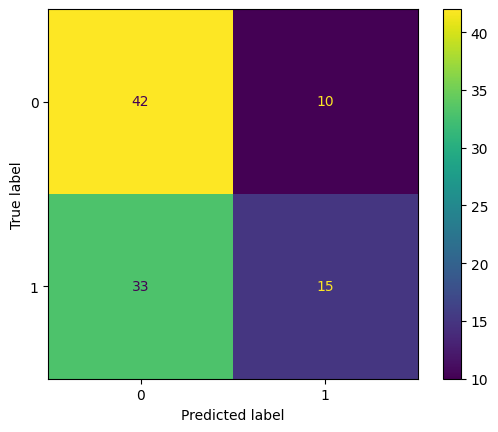

In [95]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sentiment_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
plt.figure(figsize=(10,10))
display.plot()
plt.show()

In [96]:
import pickle as pkl
pkl.dump(model,open('model.pkl','wb'))

In [97]:
pkl.dump(cv,open('cv.pkl','wb'))